In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

# Data Wrangling SPX500

In [2]:
#New York Stock Exchange Standards and Poors 500 Index
original_data_SPX500 = pd.read_csv('../../Notebooks/Datasets/Financial_dataset/SPX500.csv')
original_data_SPX500

,Unnamed: 0,SPX Index,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?
1,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME
2,#NAME?,1469.25,1478,1438.36,1455.22,997918100
3,04/01/2000,1455.22,1455.22,1397.43,1399.42,1072385800
4,05/01/2000,1399.42,1413.27,1377.68,1402.11,1265124300
...,...,...,...,...,...,...
5553,25/01/2022,4366.64,4411.01,4287.11,4356.45,822737775
5554,26/01/2022,4408.43,4453.23,4304.8,4349.93,833935669
5555,27/01/2022,4380.58,4428.74,4309.5,4326.51,762182337
5556,28/01/2022,4336.19,4432.72,4292.46,4431.85,741272695


Removing first row

In [3]:
def SPX500_Wrangler(data):
    # Delete the first row (full of null values)
    df = data.drop(labels=0)

    # Delete the index column since the date is the index
    df.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
    df.set_index('Dates', inplace=True)


    # Rename the column headers 
    df = df.drop(labels='Dates')
    df = df.drop(labels='#NAME?')
    df.columns = pd.MultiIndex.from_product([['SPX500 Index'], ['PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST', 'PX_VOLUME']])


    # Reformat dates
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y')


    
    return df



In [4]:
clean_SPX500 = SPX500_Wrangler(original_data_SPX500)


# Data Wrangling UK 10 Year Gilt Yield

In [5]:
original_data_GUKG10 = pd.read_csv('../../Notebooks/Datasets/Financial_dataset/GUKG10.csv')
original_data_GUKG10

,Unnamed: 0,GUKG10 Index,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,#NAME?,#NAME?,#NAME?,#NAME?,NaN
1,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,COUPON
2,#NAME?,5.619,5.619,5.619,5.414,NaN
3,04/01/2000,5.669,5.751,5.614,5.662,NaN
4,05/01/2000,5.679,5.759,5.676,5.754,NaN
...,...,...,...,...,...,...
5756,25/01/2022,1.145,1.185,1.141,1.164,NaN
5757,26/01/2022,1.172,1.211,1.165,1.198,NaN
5758,27/01/2022,1.237,1.265,1.216,1.228,NaN
5759,28/01/2022,1.253,1.288,1.236,1.244,NaN


In [6]:
def GUKG10_Wrangler(data):
    # Delete the first row (full of null values)
    df = data.drop(labels=0)

    # Delete the index column since the date is the index
    df.rename(columns={'Unnamed: 0': 'Dates'}, inplace=True)
    df.set_index('Dates', inplace=True)


    # Rename the column headers 
    df = df.drop(labels='Dates')
    df = df.drop(labels='#NAME?')
    df.columns = pd.MultiIndex.from_product([['GUKG10 Index'], ['PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST', 'COUPON']])


    # Reformat dates
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y')


    
    return df



In [7]:
GUKG10_Wrangler(original_data_GUKG10)

GUKG10 Index                              
                PX_OPEN PX_HIGH PX_LOW PX_LAST COUPON
Dates                                                
2000-01-04        5.669   5.751  5.614   5.662    NaN
2000-01-05        5.679   5.759  5.676   5.754    NaN
2000-01-06        5.789   5.795  5.735   5.763    NaN
2000-01-07        5.748    5.76    5.7   5.707    NaN
2000-01-10        5.698     5.7  5.619    5.63    NaN
...                 ...     ...    ...     ...    ...
2022-01-25        1.145   1.185  1.141   1.164    NaN
2022-01-26        1.172   1.211  1.165   1.198    NaN
2022-01-27        1.237   1.265  1.216   1.228    NaN
2022-01-28        1.253   1.288  1.236   1.244    NaN
2022-01-31        1.267   1.317  1.234   1.302    NaN

[5758 rows x 5 columns]

# Data Exploration


Exploring the relationship between Companies' EBITDA and the S&P500 index

In [8]:
import WranglerFunctions as wf

In [9]:
F3METL_original = pd.read_csv('../Datasets/Financial_dataset/F3METL_Comp.csv', index_col = False)

In [10]:
clean_F3METL_Comp = wf.F3Metl_Comp_Wrangler(F3METL_original)

In [11]:
clean_F3METL_Comp['GLEN LN Equity']

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,EBITDA,PE_RATIO
Dates,,,,,,,
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-01-25,391.35,395.00,385.55,388.95,30780461.0,6806.0,34.2847
2022-01-26,394.65,406.00,393.55,399.10,32497111.0,6806.0,35.2419
2022-01-27,393.85,408.25,389.95,403.20,27761107.0,6806.0,35.2116


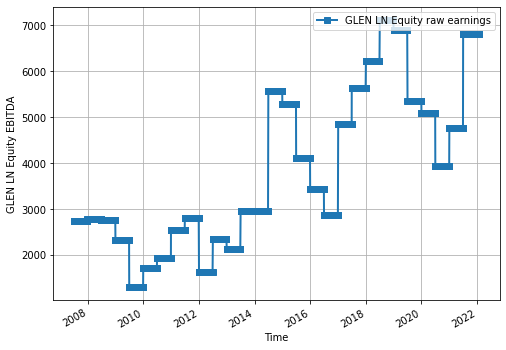

In [13]:
def linePlotEarnings(df, companyName):
    fig = plt.figure(figsize=(8,6))

    plt.plot(df[companyName].index, df[companyName]['EBITDA'], label=companyName + ' raw earnings', lw=2, marker='s')
    plt.xlabel('Time')
    plt.ylabel(companyName + ' EBITDA')
    plt.grid()
    plt.legend(loc='upper right')

    plt.gcf().autofmt_xdate()

    plt.show()
    

linePlotEarnings(clean_F3METL_Comp, 'GLEN LN Equity')

In [76]:
#plotting spx500 index
import plotly.graph_objects as go

df = clean_SPX500


In [30]:
fig = go.Figure(data=go.Ohlc(x=df.index,
                    open=df['SPX500 Index']['PX_OPEN'],
                    high=df['SPX500 Index']['PX_HIGH'],
                    low=df['SPX500 Index']['PX_LOW'],
                    close=df['SPX500 Index']['PX_LAST']))
fig.show()

In [102]:
F3METL = pd.read_csv('../Datasets/Financial_dataset/F3METL.csv', index_col = False)

df1 = wf.F3METL_Wrangler(F3METL)

df1

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,EBITDA
Dates,,,,,,
2000-01-05,4038.10,4308.90,3947.80,4188.60,NaN,NaN
2000-01-06,4188.60,4308.90,3971.90,4092.30,NaN,NaN
2000-01-07,4092.30,4212.60,3953.90,4194.60,NaN,NaN
2000-01-10,4194.60,4212.60,3899.70,3917.70,NaN,NaN
2000-01-11,3917.70,3923.80,3550.60,3616.80,NaN,NaN
...,...,...,...,...,...,...
2022-01-25,6680.75,6802.96,6680.75,6733.66,55741384.0,1629.32
2022-01-26,6733.66,6968.01,6733.66,6913.60,55269138.0,1629.32
2022-01-27,6913.60,7080.91,6819.51,7025.63,58897876.0,1629.32


In [29]:
# Plot index data
fig = go.Figure(data=go.Ohlc(x=df.index,
                    open=df1['PX_OPEN'],
                    high=df1['PX_HIGH'],
                    low=df1['PX_LOW'], 
                    close=df1['PX_LAST']))
fig.update_layout(title='FTSE350 Index', xaxis_title='Time', yaxis_title='Value(GBP)')
fig.show()



In [80]:
import scipy.stats as stats
merged_data = pd.merge(df['SPX500 Index']['PX_LAST'], df1['PX_LAST'], how ='inner', on ='Dates')
merged_data.rename(columns={'PX_LAST_x': 'SPX500 PX_LAST'}, inplace=True)
merged_data.rename(columns={'PX_LAST_y': 'FTSE350 PX_LAST'}, inplace=True)
merged_data

,SPX500 PX_LAST,FTSE350 PX_LAST
Dates,,
2000-01-05,1402.11,4188.60
2000-01-06,1403.45,4092.30
2000-01-07,1441.47,4194.60
2000-01-10,1457.6,3917.70
2000-01-11,1438.56,3616.80
...,...,...
2022-01-25,4356.45,6733.66
2022-01-26,4349.93,6913.60
2022-01-27,4326.51,7025.63


In [84]:
#Pearson coefficient between F3METL AND SPX500
data = merged_data.apply(pd.to_numeric)
c, p = stats.pearsonr(data.dropna()['SPX500 PX_LAST'], data.dropna()['FTSE350 PX_LAST'])
print(f"SPX500 Index vs FTSE350 Index Pearson Correlation: {c}\n")

SPX500 Index vs FTSE350 Index Pearson Correlation: -0.04906132357708958



In [114]:
def corr_EBITDA_FTSE(company, df):
    merged_data = pd.merge(df['PX_LAST'],clean_F3METL_Comp[company]['EBITDA'], how ='inner', on ='Dates')
    merged_data = merged_data.apply(pd.to_numeric)
    c, p = stats.pearsonr(merged_data.dropna()['PX_LAST'], merged_data.dropna()['EBITDA'])
    print(f"FTSE350 Index vs EBITDA of {company}: {c}\n")

In [115]:
corr_EBITDA_FTSE('GLEN LN Equity', df1)

FTSE350 Index vs EBITDA of GLEN LN Equity: 0.0012773044845655506



In [116]:
def corr_EBITDA_SPX(company, df):
    merged_data = pd.merge(df['SPX500 Index']['PX_LAST'],clean_F3METL_Comp[company]['EBITDA'], how ='inner', on ='Dates')
    merged_data = merged_data.apply(pd.to_numeric)
    c, p = stats.pearsonr(merged_data.dropna()['PX_LAST'], merged_data.dropna()['EBITDA'])
    print(f"SPX500 Index vs EBITDA of {company}: {c}\n")


In [118]:
corr_EBITDA_SPX('GLEN LN Equity', df)

SPX500 Index vs EBITDA of GLEN LN Equity: 0.7829853639171567

